# test_6
Test circuit number 6 is similar to test circuit number 5, but with the addition of coupled inductors. This test circuit includes all the element types except for Op Amps.

<img src="test_6.png" width="900">  

~~~
* test_6.asc
V4 1 2 AC 10
I2 3 4 5
F1 5 9 V1 5
E1 12 3 10 1 3
G1 7 10 9 4 2
H1 2 12 V2 2
R3 5 1 10
R4 3 7 1
R10 8 0 10
R14 10 9 10
R2 3 5 5
R7 8 7 6
R11 10 9 5
R12 0 10 9
R16 12 11 10
R8 3 8 5
R17 2 6 8
V1 6 3 0
V2 13 5 0
R18 12 13 4
C1 7 1 2
C2 1 9 5
L1 1 5 3 Rser=0
L2 0 11 8 Rser=0
L3 9 11 8 Rser=0
L4 4 8 10 Rser=0
;op
.ac  list 0.159154943
K1 L3 L4 0.5
* ;.ac dec 500 0.01 1
.backanno
.end

~~~

This is the modified net list, V4 line was changed. The lines for the inductors were also changed.
~~~
* test_6.asc
V4 1 2 10
I2 3 4 5
F1 5 9 V1 5
E1 12 3 10 1 3
G1 7 10 9 4 2
H1 2 12 V2 2
R3 5 1 10
R4 3 7 1
R10 8 0 10
R14 10 9 10
R2 3 5 5
R7 8 7 6
R11 10 9 5
R12 0 10 9
R16 12 11 10
R8 3 8 5
R17 2 6 8
V1 6 3 0
V2 13 5 0
R18 12 13 4
C1 7 1 2
C2 1 9 5
L1 1 5 3
L2 0 11 8
L3 9 11 8
L4 4 8 10
;op
.ac  list 0.159154943
K1 L3 L4 0.5
.backanno
.end
~~~

A coupled inductor has two or more windings that are connected by a magnetic circuit. Coupled inductors transfer energy from one winding to a different winding usually through a commonly used core. The efficiency of the magnetic coupling between both the windings is defined by the coupling factor k or by mutual inductance.

The coupling constant and the mutual inductance are related by the equation:

$k = \frac {M}{\sqrt{L1 \times L2}}$

Where k is the coupling coefficient and in spice the value of k can be from -1 to +1 to account for a a negative phase relation. Phase dots are drawn on the schematic to indicate the relative direction of the windings.  In LTspice the phase dots are associated with the negative terminal of the winding.

In LTSpice the line 
> K1 L3 L4 0.5

K1 identifies the mutual inductance between in two inductors, L3 and L4. k is the coefficient of coupling. 


Reference: https://en.wikipedia.org/wiki/Inductance#Mutual_inductance


This netlist is read into the Symbolic Modified Nodal Analysis Jupyter notebook and the following circuit equations were generated.  
~~~
                                      ⎛              1 ⎞   v₅    
-C₁⋅s⋅v₇ - C₂⋅s⋅v₉ + I_L1 + I_V4 + v₁⋅⎜C₁⋅s + C₂⋅s + ──⎟ - ── = 0
                                      ⎝              R₃⎠   R₃    
               v₂    v₆    
I_H1 - I_V4 + ─── - ─── = 0
              R₁₇   R₁₇    
                   ⎛1    1    1 ⎞   v₈   v₇   v₅      
-I_Ea1 - I_V1 + v₃⋅⎜── + ── + ──⎟ - ── - ── - ── = -I₂
                   ⎝R₈   R₄   R₂⎠   R₈   R₄   R₂      
I_L4 = I₂
                        ⎛1    1 ⎞   v₁   v₃    
I_F1 - I_L1 - I_V2 + v₅⋅⎜── + ──⎟ - ── - ── = 0
                        ⎝R₃   R₂⎠   R₃   R₂    
        v₂    v₆    
I_V1 - ─── + ─── = 0
       R₁₇   R₁₇    
                              ⎛       1    1 ⎞   v₈   v₃    
-C₁⋅s⋅v₁ - g₁⋅v₄ + g₁⋅v₉ + v₇⋅⎜C₁⋅s + ── + ──⎟ - ── - ── = 0
                              ⎝       R₇   R₄⎠   R₇   R₄    
           ⎛1    1     1 ⎞   v₃   v₇    
-I_L4 + v₈⋅⎜── + ── + ───⎟ - ── - ── = 0
           ⎝R₈   R₇   R₁₀⎠   R₈   R₇    
                             ⎛   1     1 ⎞      ⎛        1     1 ⎞    
-C₂⋅s⋅v₁ - I_F1 + I_L3 + v₁₀⋅⎜- ─── - ───⎟ + v₉⋅⎜C₂⋅s + ─── + ───⎟ = 0
                             ⎝  R₁₄   R₁₁⎠      ⎝       R₁₄   R₁₁⎠    
            ⎛ 1     1     1 ⎞      ⎛       1     1 ⎞    
g₁⋅v₄ + v₁₀⋅⎜─── + ─── + ───⎟ + v₉⋅⎜-g₁ - ─── - ───⎟ = 0
            ⎝R₁₄   R₁₂   R₁₁⎠      ⎝      R₁₄   R₁₁⎠    
               v₁₁   v₁₂    
-I_L2 - I_L3 + ─── - ─── = 0
               R₁₆   R₁₆    
                   ⎛ 1     1 ⎞   v₁₃   v₁₁    
I_Ea1 - I_H1 + v₁₂⋅⎜─── + ───⎟ - ─── - ─── = 0
                   ⎝R₁₈   R₁₆⎠   R₁₈   R₁₆    
       v₁₂   v₁₃    
I_V2 - ─── + ─── = 0
       R₁₈   R₁₈    
v₁ - v₂ = V₄
I_F1 - I_V1⋅f₁ = V₁
ea₁⋅v₁ - ea₁⋅v₁₀ + v₁₂ - v₃ = V₂
-I_V2⋅h₁ - v₁₂ + v₂ = 0
-v₃ + v₆ = 0
v₁₃ - v₅ = 0
-I_L1⋅L₁⋅s + v₁ - v₅ = 0
-I_L2⋅L₂⋅s - v₁₁ = 0
-I_L3⋅L₃⋅s - I_L4⋅M₁⋅s - v₁₁ + v₉ = 0
-I_L3⋅M₁⋅s - I_L4⋅L₄⋅s + v₄ - v₈ = 0
~~~

In [2]:
import os
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
init_printing()

Copy the text strings generated by the Symbolic Modified Nodal Analysis Jupyter notebook to the cell below.

In [3]:
v11, L4, C1, s, R18, I_V1, v6, v1, g1, V1, v12, R3, I_L4, V2, R11, I2, M1, v2, I_L3, C2, R12, v3, I_Ea1, L3, R7, L1, v8, v7, f1, v10, I_H1, I_V2, R4, R8, h1, V4, R14, v5, R17, I_F1, I_L1, v4, L2, v13, R10, ea1, I_L2, I_V4, R2, R16, v9 = symbols(' v11  L4  C1  s  R18  I_V1  v6  v1  g1  V1  v12  R3  I_L4  V2  R11  I2  M1  v2  I_L3  C2  R12  v3  I_Ea1  L3  R7  L1  v8  v7  f1  v10  I_H1  I_V2  R4  R8  h1  V4  R14  v5  R17  I_F1  I_L1  v4  L2  v13  R10  ea1  I_L2  I_V4  R2  R16  v9 ')
A = Matrix([[C1*s + C2*s + 1/R3, 0, 0, 0, -1/R3, 0, -C1*s, 0, -C2*s, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1/R17, 0, 0, 0, -1/R17, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1/R8 + 1/R4 + 1/R2, 0, -1/R2, 0, -1/R4, -1/R8, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [-1/R3, 0, -1/R2, 0, 1/R3 + 1/R2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, -1, 0, 0, 0], [0, -1/R17, 0, 0, 0, 1/R17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [-C1*s, 0, -1/R4, -g1, 0, 0, C1*s + 1/R7 + 1/R4, -1/R7, g1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -1/R8, 0, 0, 0, -1/R7, 1/R8 + 1/R7 + 1/R10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1], [-C2*s, 0, 0, 0, 0, 0, 0, 0, C2*s + 1/R14 + 1/R11, -1/R14 - 1/R11, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, g1, 0, 0, 0, 0, -g1 - 1/R14 - 1/R11, 1/R14 + 1/R12 + 1/R11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/R16, -1/R16, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1/R16, 1/R18 + 1/R16, -1/R18, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1/R18, 1/R18, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -f1, 0, 0, 0, 0, 0], [ea1, 0, -1, 0, 0, 0, 0, 0, 0, -ea1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -h1, 0, 0, 0, 0], [0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -L1*s, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -L2*s, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -L3*s, -M1*s], [0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -M1*s, -L4*s]])
X = Matrix( [v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, I_V4, I_F1, I_Ea1, I_H1, I_V1, I_V2, I_L1, I_L2, I_L3, I_L4] )
Z = Matrix( [0, 0, -I2, I2, 0, 0, 0, 0, 0, 0, 0, 0, 0, V4, V1, V2, 0, 0, 0, 0, 0, 0, 0] )

equ = Eq(A*X,Z)
equ

Eq(Matrix([
[       -C1*s*v7 - C2*s*v9 + I_L1 + I_V4 + v1*(C1*s + C2*s + 1/R3) - v5/R3],
[                                            I_H1 - I_V4 + v2/R17 - v6/R17],
[          -I_Ea1 - I_V1 + v3*(1/R8 + 1/R4 + 1/R2) - v8/R8 - v7/R4 - v5/R2],
[                                                                     I_L4],
[                    I_F1 - I_L1 - I_V2 + v5*(1/R3 + 1/R2) - v1/R3 - v3/R2],
[                                                   I_V1 - v2/R17 + v6/R17],
[       -C1*s*v1 - g1*v4 + g1*v9 + v7*(C1*s + 1/R7 + 1/R4) - v8/R7 - v3/R4],
[                         -I_L4 + v8*(1/R8 + 1/R7 + 1/R10) - v3/R8 - v7/R7],
[-C2*s*v1 - I_F1 + I_L3 + v10*(-1/R14 - 1/R11) + v9*(C2*s + 1/R14 + 1/R11)],
[           g1*v4 + v10*(1/R14 + 1/R12 + 1/R11) + v9*(-g1 - 1/R14 - 1/R11)],
[                                         -I_L2 - I_L3 + v11/R16 - v12/R16],
[                   I_Ea1 - I_H1 + v12*(1/R18 + 1/R16) - v13/R18 - v11/R16],
[                                                 I_V2 - v12/R18

## Numeric solution

In LTSpice the line:

> K1 L3 L4 0.5  

K1 identifies the mutual inductance between in two inductors, L3 and L4. k is the coefficient of coupling. 

This needs to be converted to mutual inductance.

With:  
L3 = 8  
L4 = 10  
k = 0.5  

and:  

$k = \frac {M}{\sqrt{L1 \times L2}}$

Need to solve for M  
$M = k \times {\sqrt{L1 \times L2}}$

In [4]:
# calculate the coupling constant from the mutual inductance
print('mutual inductance, M = {:.9f}'.format(0.5*np.sqrt(8*10)))

mutual inductance, M = 4.472135955


In [5]:
# enter the element values, set I2=0, K1 changed to M1
equ1a = equ.subs({
    V4:10.000000,
    I2:0.000000,
    f1:5.000000,
    ea1:3.000000,
    g1:2.000000,
    h1:2.000000,
    R3:10.000000,
    R4:1.000000,
    R10:10.000000,
    R14:10.000000,
    R2:5.000000,
    R7:6.000000,
    R11:5.000000,
    R12:9.000000,
    R16:10.000000,
    R8:5.000000,
    R17:8.000000,
    V1:0.000000,
    V2:0.000000,
    R18:4.000000,
    C1:2.000000,
    C2:5.000000,
    L1:3.000000,
    L2:8.000000,
    L3:8.000000,
    L4:10.000000,
    M1:4.472135955})    

equ1a  # display the equations

Eq(Matrix([
[                              I_L1 + I_V4 - 2.0*s*v7 - 5.0*s*v9 + v1*(7.0*s + 0.1) - 0.1*v5],
[                                                          I_H1 - I_V4 + 0.125*v2 - 0.125*v6],
[                                          -I_Ea1 - I_V1 + 1.4*v3 - 0.2*v5 - 1.0*v7 - 0.2*v8],
[                                                                                       I_L4],
[                                              I_F1 - I_L1 - I_V2 - 0.1*v1 - 0.2*v3 + 0.3*v5],
[                                                                 I_V1 - 0.125*v2 + 0.125*v6],
[-2.0*s*v1 - 1.0*v3 - 2.0*v4 + v7*(2.0*s + 1.16666666666667) - 0.166666666666667*v8 + 2.0*v9],
[                               -I_L4 - 0.2*v3 - 0.166666666666667*v7 + 0.466666666666667*v8],
[                                       -I_F1 + I_L3 - 5.0*s*v1 - 0.3*v10 + v9*(5.0*s + 0.3)],
[                                                    0.411111111111111*v10 + 2.0*v4 - 2.3*v9],
[                                     

The equations above are using the component values and the Laplace variable.

In [20]:
# solve the equations.
u1 = solve(equ1a,X)
#u1 # the solution is too long to display correctly

In [21]:
# trying pprint for a fwe of the nodes
pprint(u1[v1])

                     5                         4                         3    
2.2325166790056e+16⋅s  + 1.89060165810445e+17⋅s  + 4.32070251698074e+17⋅s  + 3
──────────────────────────────────────────────────────────────────────────────
                       5                       4                       3      
  7.2576938804988e+15⋅s  + 1.298012194946e+17⋅s  + 2.444740209787e+17⋅s  + 1.6

                     2                                         
.44523980198078e+17⋅s  + 1.21346542780886e+17⋅s + 2.9930625e+16
───────────────────────────────────────────────────────────────
                   2                                           
9584751982685e+17⋅s  + 4.81277812834983e+16⋅s + 5.0601675e+15  


In [22]:
pprint(u1[v2])

                       5                         4                         3  
- 5.0251772014932e+16⋅s  - 1.10895202913556e+18⋅s  - 2.01266995808892e+18⋅s  -
──────────────────────────────────────────────────────────────────────────────
                       5                       4                       3      
  7.2576938804988e+15⋅s  + 1.298012194946e+17⋅s  + 2.444740209787e+17⋅s  + 1.6

                       2                                        
 1.35132353962877e+18⋅s  - 3.59931270054097e+17⋅s - 2.067105e+16
────────────────────────────────────────────────────────────────
                   2                                            
9584751982685e+17⋅s  + 4.81277812834983e+16⋅s + 5.0601675e+15   


## AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.

In [23]:
equ1a_1rad_per_s = equ1a.subs({s:1j})
equ1a_1rad_per_s  # display the equations

Eq(Matrix([
[                              I_L1 + I_V4 + v1*(0.1 + 7.0*I) - 0.1*v5 - 2.0*I*v7 - 5.0*I*v9],
[                                                          I_H1 - I_V4 + 0.125*v2 - 0.125*v6],
[                                          -I_Ea1 - I_V1 + 1.4*v3 - 0.2*v5 - 1.0*v7 - 0.2*v8],
[                                                                                       I_L4],
[                                              I_F1 - I_L1 - I_V2 - 0.1*v1 - 0.2*v3 + 0.3*v5],
[                                                                 I_V1 - 0.125*v2 + 0.125*v6],
[-2.0*I*v1 - 1.0*v3 - 2.0*v4 + v7*(1.16666666666667 + 2.0*I) - 0.166666666666667*v8 + 2.0*v9],
[                               -I_L4 - 0.2*v3 - 0.166666666666667*v7 + 0.466666666666667*v8],
[                                       -I_F1 + I_L3 - 5.0*I*v1 - 0.3*v10 + v9*(0.3 + 5.0*I)],
[                                                    0.411111111111111*v10 + 2.0*v4 - 2.3*v9],
[                                     

In [24]:
ans1 = solve(equ1a_1rad_per_s,X)
ans1

In [25]:
for name, value in ans1.items():
    print('{:5s}: mag: {:10.6f} phase: {:11.5f} deg'.format(str(name),float(abs(value)),float(arg(value)*180/np.pi)))

v1   : mag:   1.636070 phase:   -13.11677 deg
v2   : mag:   8.414810 phase:  -177.47114 deg
v3   : mag:   0.586907 phase:    -3.58647 deg
v4   : mag:   1.987061 phase:    30.48855 deg
v5   : mag:   7.659782 phase:    29.94145 deg
v6   : mag:   0.586907 phase:    -3.58647 deg
v7   : mag:   1.673460 phase:     2.22824 deg
v8   : mag:   0.848285 phase:     0.50677 deg
v9   : mag:   1.767765 phase:    29.61857 deg
v10  : mag:   0.268017 phase:    -3.58593 deg
v11  : mag:   0.916416 phase:   -90.55635 deg
v12  : mag:   3.543942 phase:   163.15717 deg
v13  : mag:   7.659782 phase:    29.94145 deg
I_V4 : mag:   5.376987 phase:  -165.04783 deg
I_F1 : mag:   5.624122 phase:  -177.86924 deg
I_Ea1: mag:   1.485962 phase:  -145.54176 deg
I_H1 : mag:   4.287481 phase:  -161.71024 deg
I_V1 : mag:   1.124824 phase:  -177.86924 deg
I_V2 : mag:   2.602977 phase:  -164.42117 deg
I_L1 : mag:   2.186723 phase:   129.74508 deg
I_L2 : mag:   0.114552 phase:    -0.55635 deg
I_L3 : mag:   0.295629 phase:   -4

The results from LTSpice AC analysis at 0.159 Hz are shown below.   
~~~
--- AC Analysis ---

frequency:	0.159155	Hz
V(1):	mag:    1.63601 phase:   -13.1107° 	voltage
V(2):	mag:    8.41482 phase:   -177.472° 	voltage
V(3):	mag:   0.586932 phase:    -3.5698° 	voltage
V(4):	mag:    1.98715 phase:    30.4941° 	voltage
V(5):	mag:    7.65904 phase:    29.9359° 	voltage
V(9):	mag:    1.76784 phase:    29.6245° 	voltage
V(12):	mag:    3.54398 phase:    163.161° 	voltage
V(10):	mag:   0.267951 phase:   -3.57561° 	voltage
V(7):	mag:    1.67347 phase:    2.23357° 	voltage
V(8):	mag:   0.848303 phase:   0.515418° 	voltage
V(11):	mag:   0.916372 phase:   -90.5542° 	voltage
V(6):	mag:   0.586932 phase:    -3.5698° 	voltage
V(13):	mag:    7.65904 phase:    29.9359° 	voltage
I(C1):	mag:   0.886775 phase:    169.759° 	device_current
I(C2):	mag:    6.23127 phase:    2.60368° 	device_current
I(F1):	mag:    5.62415 phase:   -177.869° 	device_current
I(H1):	mag:    4.28722 phase:   -161.715° 	device_current
I(L1):	mag:     2.1864 phase:    129.758° 	device_current
I(L2):	mag:   0.114546 phase:  -0.547059° 	device_current
I(L3):	mag:   0.295638 phase:   -40.8067° 	device_current
I(L4):	mag:          0 phase:          0° 	device_current
I(I2):	mag:          0 phase:          0° 	device_current
I(R3):	mag:   0.655921 phase:    39.7384° 	device_current
I(R4):	mag:    1.09116 phase:   -174.649° 	device_current
I(R10):	mag:  0.0848303 phase:   0.515418° 	device_current
I(R14):	mag:   0.155058 phase:   -144.946° 	device_current
I(R2):	mag:    1.43539 phase:   -147.477° 	device_current
I(R7):	mag:   0.137657 phase:   -176.002° 	device_current
I(R11):	mag:   0.310117 phase:   -144.946° 	device_current
I(R12):	mag:  0.0297724 phase:    176.424° 	device_current
I(R16):	mag:   0.390139 phase:    150.131° 	device_current
I(R8):	mag:  0.0532334 phase:   -170.446° 	device_current
I(R17):	mag:    1.12483 phase:   -177.869° 	device_current
I(R18):	mag:    2.60288 phase:   -164.425° 	device_current
I(G1):	mag:   0.442308 phase:   -142.538° 	device_current
I(E1):	mag:    1.48573 phase:   -145.548° 	device_current
I(V4):	mag:    5.37676 phase:   -165.052° 	device_current
I(V1):	mag:    1.12483 phase:   -177.869° 	device_current
I(V2):	mag:    2.60288 phase:   -164.425° 	device_current
~~~
The LTSpice results are the same as those from the Python code.

## AC Sweep
Looking at node 10 voltage and comparing the results with those obtained from LTSpice. The frequency sweep is from 0.01 Hz to 1 Hz.

Load the csv file of node 10 voltage over the sweep range and plot along with the results obtained from SymPy.

In [26]:
os.chdir('/home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Test Circuits/test_6/') # change directory to net list location

fn = 'test_6.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

# change the working director back to the Jupyter folder
os.chdir('/home/jeff32/Documents/JupyterLab/Node Analysis/')  

In [27]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

Load the Laplace polyinominal for node 5

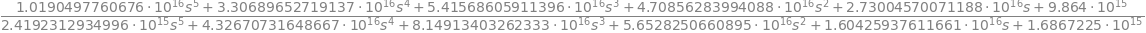

In [28]:
H = u1[v10]
H

In [29]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system_c1 = (a, b) # system for circuit 1

In [30]:
x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 10000, endpoint=True)
w_c1, mag_c1, phase_c1 = signal.bode(system_c1, w=x) # returns: rad/s, mag in dB, phase in deg

Plot the results.

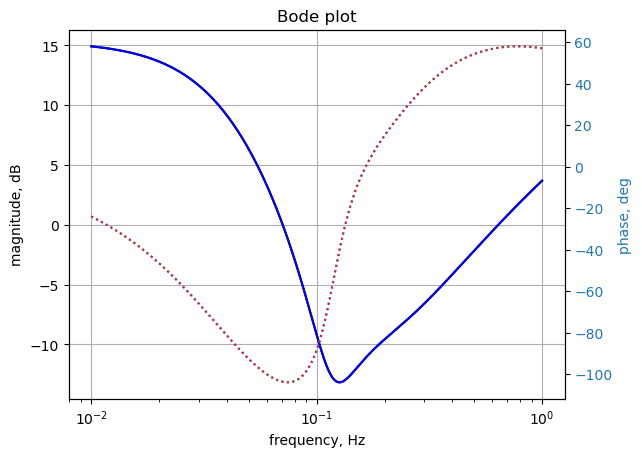

In [31]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-k')    # Bode magnitude plot
plt.semilogx(w_c1/(2*np.pi), mag_c1,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.angle(voltage)*180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w_c1/(2*np.pi), phase_c1,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Bode plot')
plt.show()

The SymPy and LTSpice results overlay each other. 